In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [3]:
boston_data = boston.drop(['Target'],axis=1)
target = boston[['Target']]

## crim, rm, lstat을 통한 다중 선형 회귀분석

In [4]:
x_data = boston[['CRIM','RM','LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [5]:
x_data1 = sm.add_constant(x_data, has_constant='add')

multi_model = sm.OLS(target, x_data1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          1.01e-112
Time:                        11:58:11   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## crim, rm, lstat, b, tax, age, zn, nox, indus 변수를 통한 다중선형회귀분석 

In [6]:
x_data2 = boston[['CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS']]  # 변수 추가
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [7]:
x_data22 = sm.add_constant(x_data2, has_constant='add')

full_model = sm.OLS(target, x_data22).fit()
full_model.summary()

# NOX 변수의 std err = 3.833. p-value 높음.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          5.76e-111
Time:                        11:58:11   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [9]:
full_model.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

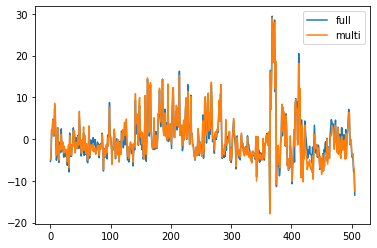

In [10]:
import matplotlib.pyplot as plt

full_model.resid.plot(label="full")
multi_model.resid.plot(label="multi")
plt.legend()

# 두 모델 사이의 잔차 차이가 거의 없음.

## 상관계수/산점도를 통해 다중공선성 확인

In [11]:
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


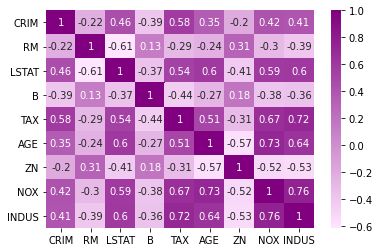

In [12]:
cmap = sns.light_palette("purple", as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

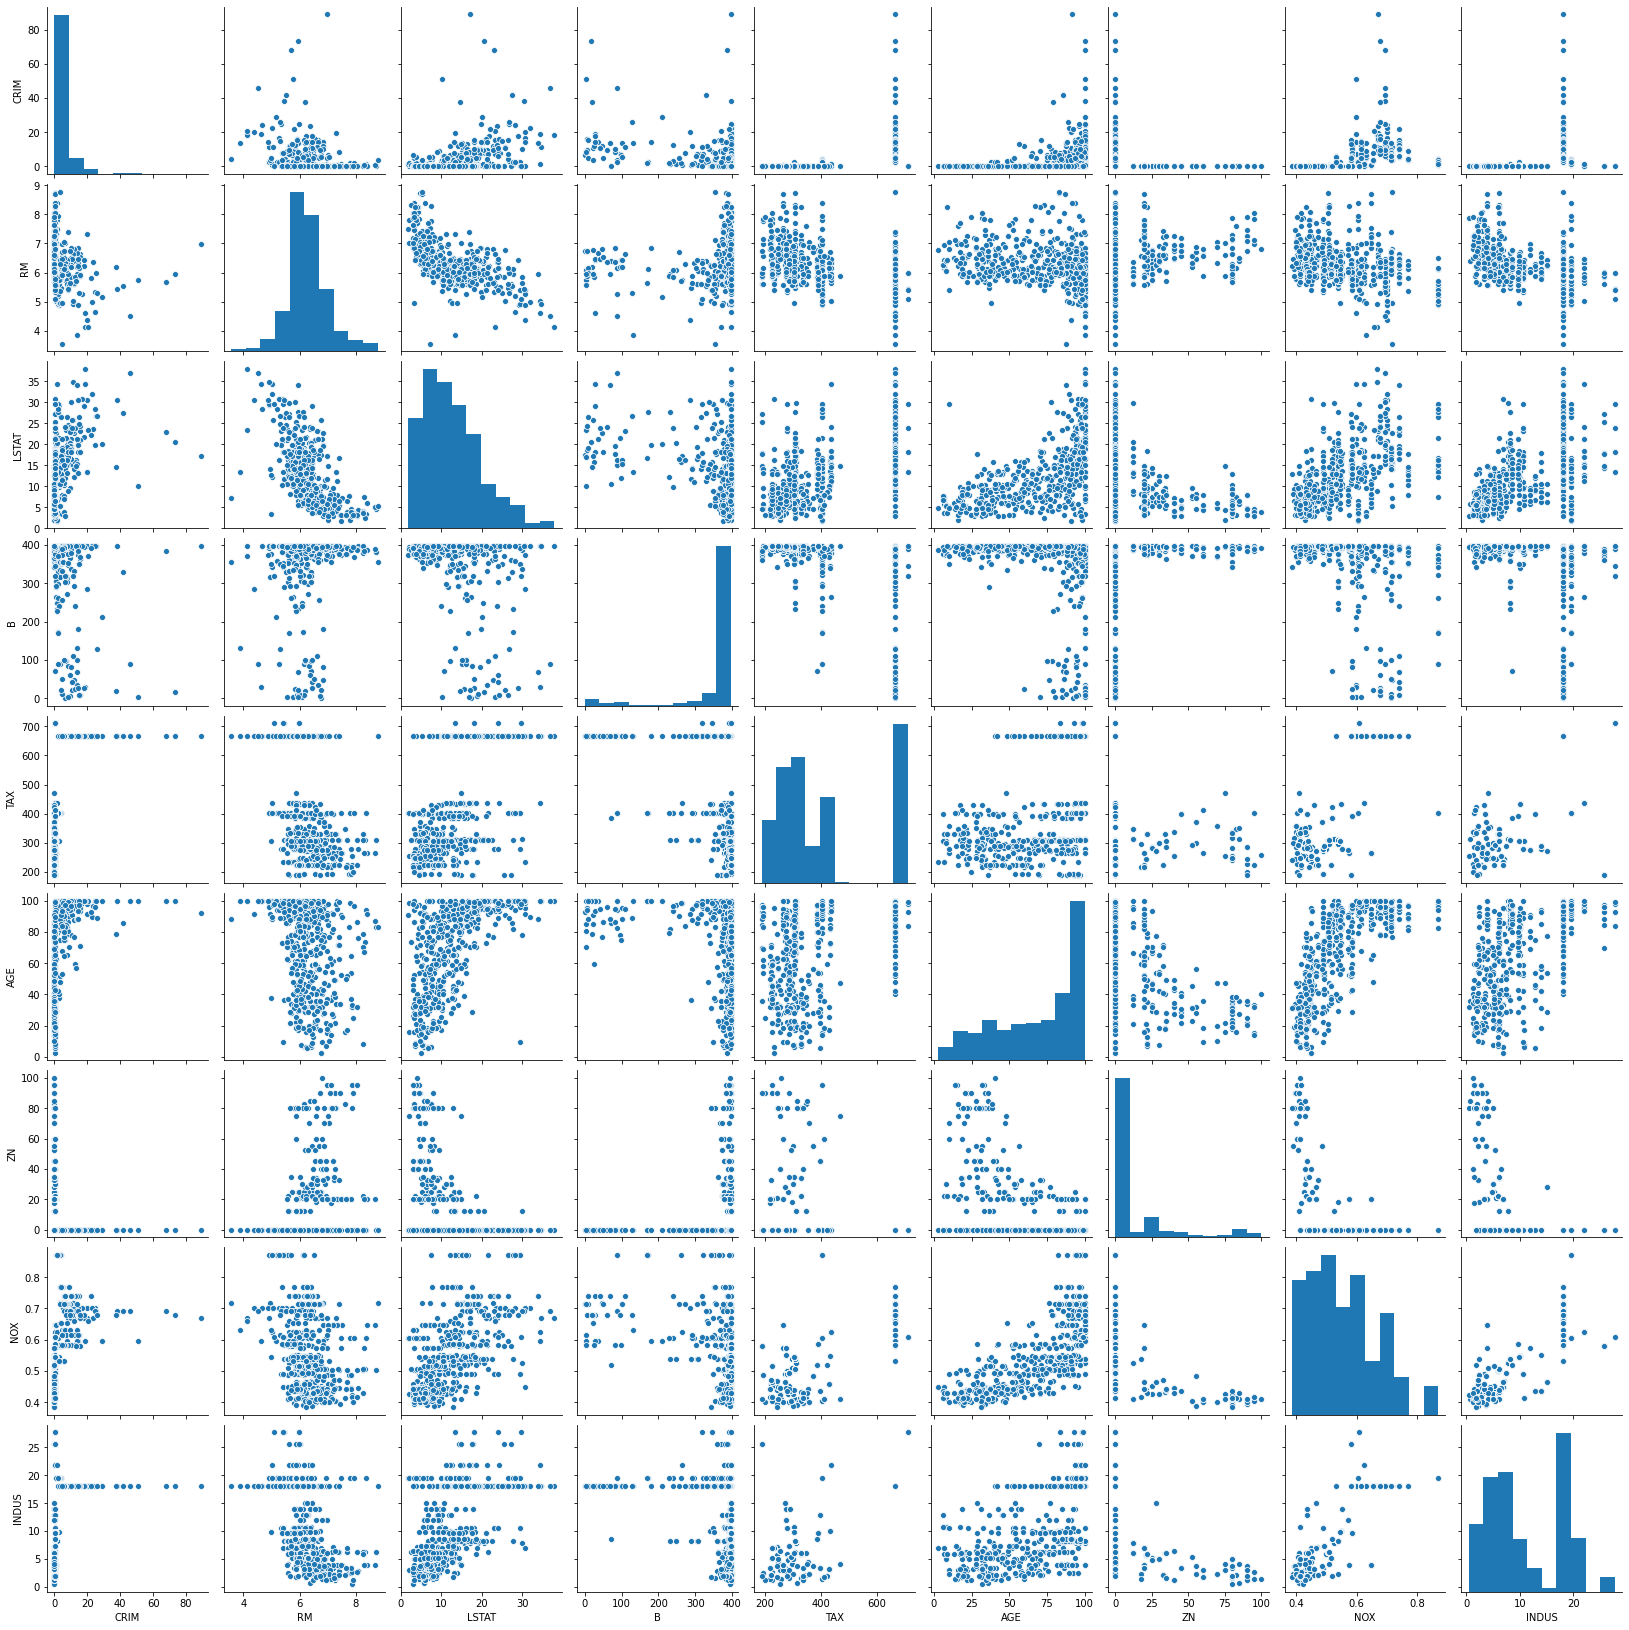

In [13]:
sns.pairplot(x_data2)
plt.show()

# VIF를 통한 다중공선성 확인

* 한 변수에 대해 나머지 변수의 선형결합으로 설명할 수 있는 정도
* VIF > 10 이면 다중공선성이 있는 변수

In [14]:
x_data2.shape

(506, 9)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

# NOX - highest

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [16]:
vif = pd.DataFrame()

x_data3 = x_data2.drop('NOX',axis=1)   # NOX 제거

vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

# RM - highest

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [17]:
# NOX 제거된 데이터로 다시 다중선형회귀 실행
x_data33 = sm.add_constant(x_data3, has_constant='add')

vif_model = sm.OLS(target, x_data33).fit()
vif_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          7.62e-112
Time:                        11:58:28   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
vif = pd.DataFrame()

x_data4 = x_data3.drop('RM',axis=1)   # RM 제거

vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [19]:
# 정제된 데이터로 다시 다중선형회귀 실행
x_data5 = sm.add_constant(x_data4, has_constant='add')

vif_model = sm.OLS(target, x_data5).fit()
vif_model.summary()

# R-square 나 AIC 등은 위의 모델이 더 좋다.
# RM은 제거하지 않아도 된다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           5.53e-89
Time:                        11:58:28   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          5.76e-111
Time:                        11:58:28   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 학습 / 검증데이터 분할

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
X_1 = x_data22    # full
X_2 = x_data3     # NOX 제거
X_3 = x_data4     # NOX, RM 제거

y = target

In [23]:
X_2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,2.18


In [24]:
X_3.head()

,CRIM,LSTAT,B,TAX,AGE,ZN,INDUS
0,0.00632,4.98,396.90,296,65.2,18.0,2.31
1,0.02731,9.14,396.90,242,78.9,0.0,7.07
2,0.02729,4.03,392.83,242,61.1,0.0,7.07
3,0.03237,2.94,394.63,222,45.8,0.0,2.18
4,0.06905,5.33,396.90,222,54.2,0.0,2.18


In [25]:
train_x, test_x, train_y, test_y = train_test_split(X_1, y, train_size=0.7, test_size=0.3, random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

train_x2, test_x2, train_y2, test_y2 = train_test_split(X_2, y, train_size=0.7, test_size=0.3, random_state = 1)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

train_x3, test_x3, train_y3, test_y3 = train_test_split(X_3, y, train_size=0.7, test_size=0.3, random_state = 1)
print(train_x3.shape, test_x3.shape, train_y3.shape, test_y3.shape)

(354, 10) (152, 10) (354, 1) (152, 1)
(354, 8) (152, 8) (354, 1) (152, 1)
(354, 7) (152, 7) (354, 1) (152, 1)


In [26]:
fit_1 = sm.OLS(train_y, train_x).fit()

fit_2 = sm.OLS(train_y2, train_x2).fit()

fit_3 = sm.OLS(train_y3, train_x3).fit()

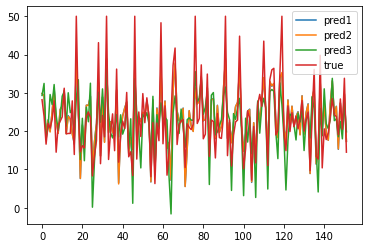

In [27]:
## true값과 예측값 비교 
plt.plot(np.array(fit_1.predict(test_x)),  label="pred1")
plt.plot(np.array(fit_2.predict(test_x2)), label="pred2")
plt.plot(np.array(fit_3.predict(test_x3)), label="pred3")
plt.plot(np.array(test_y2), label="true")
plt.legend()
plt.show()

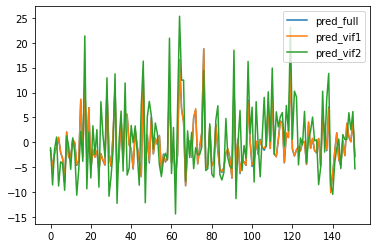

In [28]:
# 잔차 비교
plt.plot(np.array(test_y2['Target']-fit_1.predict(test_x)), label="pred_full")
plt.plot(np.array(test_y2['Target']-fit_2.predict(test_x2)), label="pred_vif1")
plt.plot(np.array(test_y2['Target']-fit_3.predict(test_x3)), label="pred_vif2")
plt.legend()
plt.show()

# MSE를 통한 검증데이터에 대한 성능비교

In [29]:
mse_1 = mean_squared_error(y_true=test_y['Target'], y_pred=fit_1.predict(test_x))

mse_2 = mean_squared_error(y_true=test_y2['Target'], y_pred=fit_2.predict(test_x2))

mse_3 = mean_squared_error(y_true=test_y3['Target'], y_pred=fit_3.predict(test_x3))

print(mse_1)
print(mse_2)  # NOX 제거하고 RM은 제거하지 않은 모델의 성능이 가장 좋다.
print(mse_3)

26.148631468819858
25.594813292253534
57.71900270631699
